# Introduction

The dataset contains the information about the date fruit. The aim of this study is to classify the types of date fruit, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai by using three different machine learning methods. The external appearance features such as color, shape, length and diameter are the major determinant of the fruit type. It is a time-consuming process and reuires great effort to determine the type of fruit, by looking at its appearance. 

## Load the dataset

In [1]:
# Import required libraries and built-in python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("Date_Fruit_Datasets.csv")

In [3]:
# Print the header
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [4]:
# Summarize the data
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


Since the dataset contains 34 columns, but only few of them appeared here. To check all the columns , we can print the feature names.

In [5]:
# Print the columns
(data.columns)

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

## Understanding the columns

* **AREA and PERIMETER**- the size measurement of the date.   
* **MAJOR_AXIS and MINOR_AXIS**- Length and width measurements.   
* **ECENTRICITY and EQDIASQ**- Shape measurements.   
* **SOLIDITY and CONVEX_AREA**- More shape features.    
* **EXTENT and ASPECT_RATIO**- More measurements.   
* **ROUNDNESS and COMPACTNESS**- How round and compact the date is.    
* **SHAPEFACTOR_1 to SHAPEFACTOR_4**: Mathematical shape descriptions.   
* **MeanRR, MeanRG, MeanRB**: Color measurements(Red, Green, Blue).     
* **StdDevRR, StdDevRG, StdDevRB**: How much the color varies.    
* **SkewRR, SkewRG, SkewRB**: Statistical skewness of the Red, Green and Blue channel.   
* **KurtosisRR, KurtosisRG, KurtosisRB**: shape of the pixel intensity distribution in Red, Green and Blue channel.   
* **EntropyRR, EntropyRG, EntropyRB**: Entropy of Red, Green and Blue channel.   
* **ALLdaub4RR, ALLdaub4RG, ALLdaub4RB**: wavelet texture feature from Red, Green and Blue channel.   
* **Class**: This is the target and contains various date types.   

## Observations about the dataset

* The dataset contains 898 samples and 34 columns, including the label column class.
* There are no missing values in the dataset. As all the columns have 898 entries.
* The color features (MeanRR, MeanRG, MeanRB) cover wide ranges: red (59.4–255), green (45.4–247), and blue (19.8–247), showing that dates vary significantly in color intensity.
* The ASPECT_RATIO has a minimum of 1.065 but a maximum of 535.5, which likely represents outliers or measurement errors.
* The AREA feature ranges from 1,987 to 546,063, with an average of 298,295 and a median of 319,833.
* The PERIMETER ranges from 911.8 to 2,812.0. Average is 2,057.7.
* The MAJOR_AXIS length varies from 336.7 to 1,222.7, with a mean of 750.8.
* The MINOR_AXIS shows extreme variation, from as small as 2.3 up to 766.5.
* Quartile analysis shows that most of the features are fairly symmetric, but MINOR_AXIS has a huge spread in its lower quartile.

## Verify the quality of the data

In [6]:
# Check for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

**Observations**: The dataset contains the correct datatype for each column. Most of the columns contain decimal numbers, except for the AREA, CONVEX_AREA and ENTROPYRB and RG are the integers. And since the label 'Class' contains the names of various types of date fruit. It must have been text and stored as object datatype.
- Key point noticed: Out of the three entropy values of the three color channel, Entropy RB and Entropy RG are stored as integer, while Entropy RR is stored as float. Since Entropy is a continuous measure commonly, we need to verify the column values and take action accordingly.

In [11]:
# Quick check for Entropy columns values
data[['EntropyRR', 'EntropyRG', 'EntropyRB']].head(10)

,EntropyRR,EntropyRG,EntropyRB
0,-5.919126e+10,-50714214400,-39922372608
1,-3.423307e+10,-37462601728,-31477794816
2,-9.394835e+10,-74738221056,-60311207936
3,-3.207431e+10,-32060925952,-29575010304
4,-3.998097e+10,-35980042240,-25593278464
5,-4.114037e+10,-33146710016,-27907301376
6,-6.371167e+10,-64060743680,-52603465728
7,-2.987358e+10,-33570080768,-33054025728
8,-9.526242e+10,-79321833472,-69569445888
9,-7.434112e+10,-58172182528,-42640556032


**Observations**: There is a huge difference in the values of three Entropy columns. The numbers of Entropy RG and Entropy RB are far outside the normal range of entropy. We need to convert them to float.

In [12]:
# Convert datatypes of Entropy columns 
data['EntropyRG'] = data['EntropyRG'].astype('float64')
data['EntropyRB'] = data['EntropyRB'].astype('float64')

In [13]:
# Verify the results 
data[['EntropyRG', 'EntropyRB']].head()

,EntropyRG,EntropyRB
0,-5.071421e+10,-3.992237e+10
1,-3.746260e+10,-3.147779e+10
2,-7.473822e+10,-6.031121e+10
3,-3.206093e+10,-2.957501e+10
4,-3.598004e+10,-2.559328e+10


In [14]:
# Check for datatype after conversion 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

**Observations**: All the columns now contain float datatype, except for the Area and convex area. To cross check the datatype, we will now print the results for these two columns.

In [15]:
# Quick check for Area and Convex area
data[['AREA', 'CONVEX_AREA']].head()

,AREA,CONVEX_AREA
0,422163,424428
1,338136,339014
2,526843,528876
3,416063,418255
4,347562,350797


**Observations**: These columns represent the integers and therefore, stored in the correct datatype.

In [7]:
# Check for missing values
data.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

**Observations**: The dataset contains 0 missing values.

In [8]:
# Check for duplicates
data.duplicated().sum()

0

**Observations**: The dataset has 0 duplicated values.

**Key highlights from data cleaning part**

* **Datatype Verification -** Almost all the columns contain the correct datatypes, except for the entropy columns. Two of the three entropy columns were stored in the wrong datatype,which messes with the stored values. After quick check of these two columns, the datatype was converted to float64 from int64.
* **Missing values-** Since the dataset contains no missing values, no further action was required here.
* **Duplicate values-** The dataset does not contain any duplicated values, no further action required here.

After performing the required data cleaning (datatype conversion), the dataset seems structurally clean. 

## Visualization using seaborn.barplot

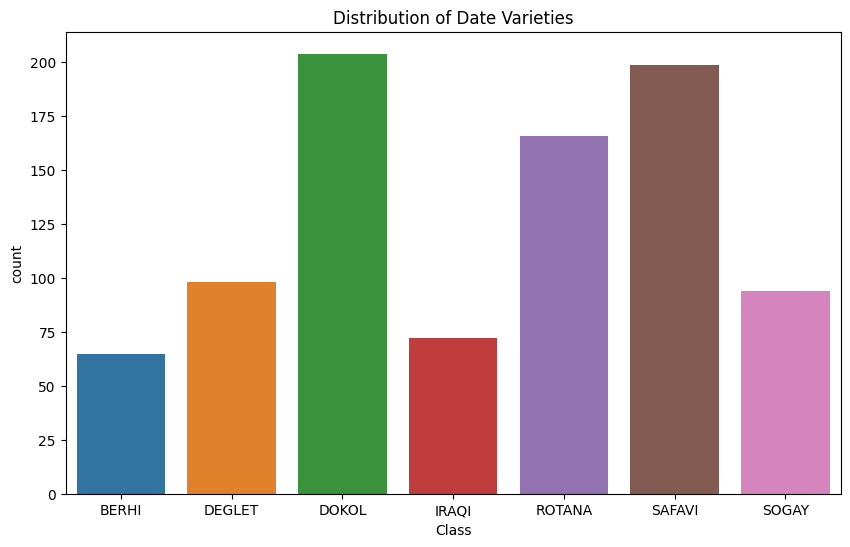

In [20]:
# Visualize the Data
plt.figure(figsize=(10,6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Date Varieties')
plt.show()

In [19]:
# Value count for each type
(data['Class'].value_counts())

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

**Key highlights from the barplot**

Following are the observations based on the bar plot:
* There is a significant difference in the number of samples between the most frequent and least frequent varities, which shows that the dataset is not well-balanced.
* The varieties DOKOL and SAFAVI, represents about 45% of all samples.
* The varieties BERHI, IRAQI and SOGAY are the minority classes.
* Since the majority classes have nearly three times the samples as compared to the minority classes, It may impact the modeling. The machine learning model may become better at identifying DOKOL and SAFAVI dates while less accurate when identifying BERHI or IRAQI dates. This imbalance needs to be addressed during model training to ensure fair varieties across all date varieties.

## Move the labels into separate dataframes

In [21]:
# Separate Features (X) and Labels (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [24]:
# Verify the features
X

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-5.919126e+10,-5.071421e+10,-3.992237e+10,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-3.423307e+10,-3.746260e+10,-3.147779e+10,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-9.394835e+10,-7.473822e+10,-6.031121e+10,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-3.207431e+10,-3.206093e+10,-2.957501e+10,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-3.998097e+10,-3.598004e+10,-2.559328e+10,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-2.529642e+10,-1.916888e+10,-1.847339e+10,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-3.160522e+10,-2.194537e+10,-1.927791e+10,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-2.224277e+10,-1.959492e+10,-1.759215e+10,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-2.604860e+10,-2.129982e+10,-1.980998e+10,51.2267,45.7162,45.6260


In [23]:
# Verify the label
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

**Observations**: The dataset is successfully divided into X and y, X representing features and y contains label.

## Label Encoding and Scaling

In [25]:
# Import the required libraries and packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

**Convert the string labels into integers using sklearn.preprocessing.LabelEncoder**

In [26]:
# Convert text labels to numbers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [28]:
# Verify the result by printing the corresponding number to the fruits
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label Mapping:", mapping)

Label Mapping: {'BERHI': 0, 'DEGLET': 1, 'DOKOL': 2, 'IRAQI': 3, 'ROTANA': 4, 'SAFAVI': 5, 'SOGAY': 6}


**Use sklearn.preprocessing.MinMaxScaler to scale the features**

In [29]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**Split the data into training, testing and validation sets with appropriate proportions**

In [32]:
# Split into Training (60%), Validation (20%), and Testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}, Val size: {len(X_val)}, Test size: {len(X_test)}")

Train size: 538, Val size: 180, Test size: 180


## Reshaping the labels into a 2d array

In [33]:
# Reshaping the labels into a 2D array as per requirements
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Labels reshaped to 2D. Current Training Label Shape:", y_train.shape)

Labels reshaped to 2D. Current Training Label Shape: (538, 1)


## Label Encoding and Mapping

Since the machine learning model requires numerical inputs, the date variety names (strings) have been converted into integers using `LabelEncoder`. The labels were then reshaped into a 2D array to ensure compatibility with the neural network's input requirements.

**Mapping Reference:**
* **0**: BERHI
* **1**: DEGLET
* **2**: DOKOL
* **3**: IRAQI
* **4**: ROTANA
* **5**: SAFAVI
* **6**: SOGAY

**Data Scaling and Splitting**  
To prevent the features with large magnitudes (like 'Area') from dominating the model, `MinMaxScaler` is applied to normalize all features to a range between 0 and 1.The dataset was then split into three subsets:
1. **Training Set (538 samples)**: Used for the model to learn the features.
2. **Validation Set (180 samples)**: Used to tune hyperparameters and prevent overfitting.
3. **Testing Set (180 samples)**: Used as a final "blind" test to evaluate performance.

## Modeling

In [45]:
# Import the required libraries and packages
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Artificial Neural Network Modeling**

A Neural Network consists of layers of "neurons." 
* **Input Layer:** Needs 34 neurons (one for each feature like Area, Perimeter, etc.).
* **Hidden Layers:** This is where the model looks for complex patterns.
* **Output Layer:** Needs 7 neurons (one for each date variety).

## The Confusion Matrix Function

Before starting building the model, it is crucial to get a helper tool. It grabs the last epoch’s accuracy and validation accuracy from the training history and prints them in a clean format. The matrix shows exactly where the model is correct and where it makes mistakes. And gives a visual and intuitive understanding of model performance.

In [46]:
def show_results(model, history, name):
    # 1. Calculate Accuracies
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    print(f"{name} Results\n")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}\n")

    # 2. Predict and Create Confusion Matrix
    y_pred = np.argmax(model.predict(X_val), axis=1)
    cm = confusion_matrix(y_val, y_pred)

    # 3. Plotting
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Model 1: The Simple Baseline

**Description**
* **Layers:** 2 Hidden Layers (32 neurons, then 16 neurons).
* **Activation:** relu (The standard choice for hidden layers).
* **Optimizer:** adam (The most popular "speed controller" for learning).

In [47]:
# Creating Model 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [48]:
# Compile Model 1
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Train Model 1 (epochs=50)
history1 = model1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=0
)

Model 1 (Baseline) Results

Training Accuracy: 0.8439
Validation Accuracy: 0.8833

6/6 [==============================] - 0s 600us/step


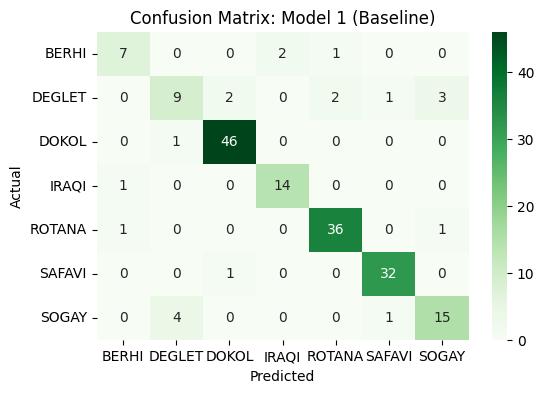

In [51]:
# Verify the results
show_results(model1, history1, "Model 1 (Baseline)")

The Training Accuracy and Validation Accuracy of model 1 is 0.8439 and 0.8833 respectively.

# Model 2: The Wide Model (Increased Neurons)
**Description**: 2 hidden layers are used with much higher dimensions (128 and 64 neurons) to test if a "bigger brain" learns the fruit features better.

In [53]:
# Create model 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [54]:
# Compile Model 2
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
# Train Model 2
history2 = model2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=0
)

Model 2 (Wide) Results

Training Accuracy: 0.8978
Validation Accuracy: 0.8889

6/6 [==============================] - 0s 800us/step


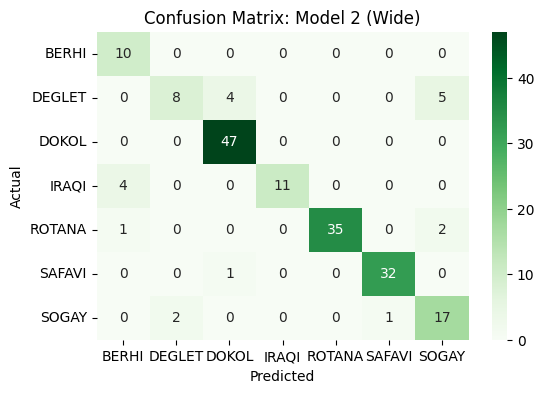

In [56]:
# Verify the results
show_results(model2, history2, "Model 2 (Wide)")

The Training Accuracy and Validation Accuracy of model 2 is 0.8978 and 0.8889 respectively.

# Model 3: The Deep Model (Extra Hidden Layer)
- **Description:** We added a third hidden layer. This creates a deeper network (64 -> 32 -> 16 neurons) to see if more layers help with classification.

In [57]:
# Creating model 3
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), # Extra layer
    tf.keras.layers.Dense(7, activation='softmax')
])

In [59]:
# Compile Model 3
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
# Train Model 3
history3 = model3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=0
)

Model 3 (Deep) Results

Training Accuracy: 0.8587
Validation Accuracy: 0.8500

6/6 [==============================] - 0s 1ms/step


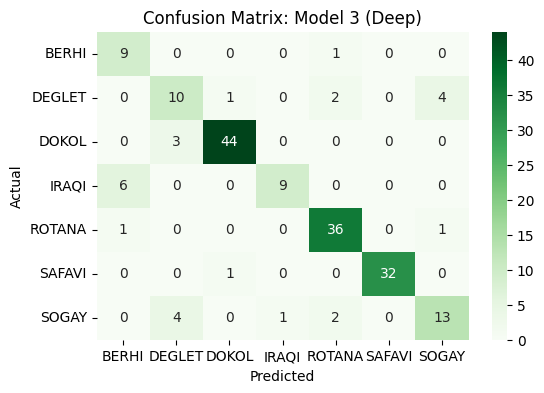

In [61]:
# Verify the results
show_results(model3, history3, "Model 3 (Deep)")

The Training Accuracy and Validation Accuracy of Model 3 is 0.8587 and 0.8500 respectively.

# Model 4: Different Activation (Tanh)
- **Description:** We went back to 2 layers (64, 32) but changed the activation from ReLU to Tanh. Tanh maps data between -1 and 1, which can change how the model perceives the scaled data.

In [64]:
# Creating model 4
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [65]:
# Compile Model 4
model4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [66]:
# Train Model 4
history4 = model4.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=0
)

Model 4 (Tanh) Results

Training Accuracy: 0.6301
Validation Accuracy: 0.6444

6/6 [==============================] - 0s 1ms/step


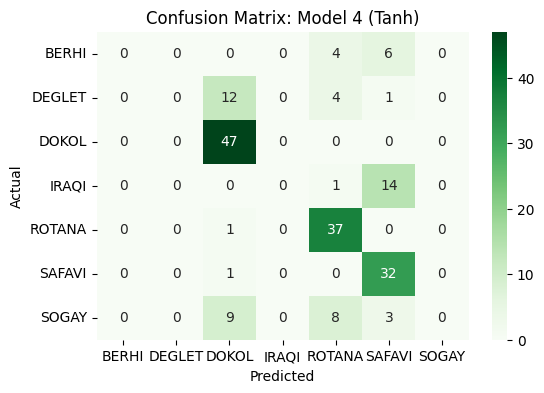

In [67]:
# Verify the results
show_results(model4, history4, "Model 4 (Tanh)")

The Training Accuracy and Validation Accuracy of Model 4 is 0.6301 and 0.6444 respectively.

# Model 5: Different Optimizer (SGD)

**Description:** We used the same shape as Model 1 but replaced the 'Adam' optimizer with SGD (Stochastic Gradient Descent). This is a more basic way of updating weights to see if "slower" learning is more stable.

In [68]:
# Create Model 5
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [69]:
# Compile Model 5
# We change optimizer to 'sgd'
model5.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [70]:
# Train Model 5
history5 = model5.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=0
)

Model 5 (SGD) Results

Training Accuracy: 0.6673
Validation Accuracy: 0.6833

6/6 [==============================] - 0s 1ms/step


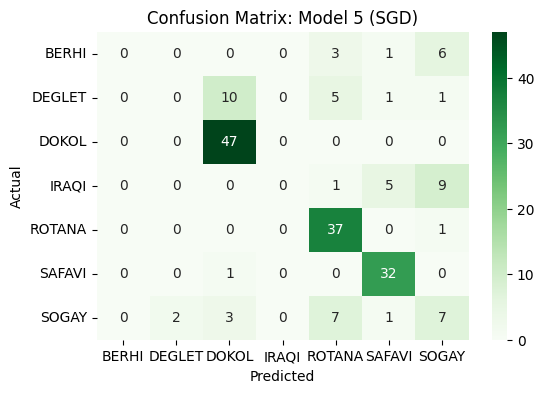

In [71]:
# Verify the results
show_results(model5, history5, "Model 5 (SGD)")

The Training Accuracy and Validation Accuracy of Model 5 is 0.6673 and 0.6833 respectively.

## Run the trained (best) model on the test set

After comparing the models, I selected **Model 2** because it had the best validation score out of all 5. We will now test it on the Testing set to see how it performs on completely new data. And to ensure that the results produced are honest and the model did not just memorize the training data.

In [72]:
# Import the packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 1. Use the best model (Model 2) to predict the Testing Set
test_predictions = np.argmax(model2.predict(X_test), axis=1)

6/6 [==============================] - 0s 4ms/step


In [73]:
# 2. Compare the results to the actual true labels to get the score
test_acc = accuracy_score(y_test, test_predictions)
print(f"FINAL TEST ACCURACY: {test_acc * 100:.2f}%")

FINAL TEST ACCURACY: 91.67%


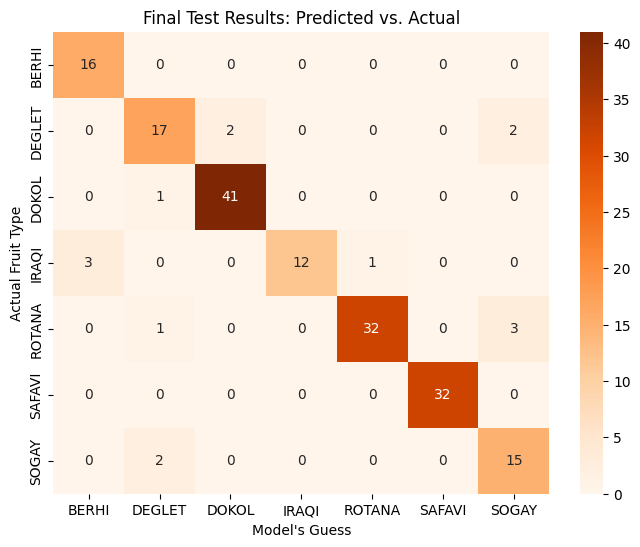

In [74]:
# 3. Draw the final Confusion Matrix (The Scorecard)
plt.figure(figsize=(8, 6))
final_cm = confusion_matrix(y_test, test_predictions)

sns.heatmap(final_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)

plt.title("Final Test Results: Predicted vs. Actual")
plt.ylabel('Actual Fruit Type')
plt.xlabel('Model\'s Guess')
plt.show()

In [75]:
# 4. Show a simple text report of the results
print("\nSuccess Rate per Variety:")
print(classification_report(y_test, test_predictions, target_names=encoder.classes_))


Success Rate per Variety:
              precision    recall  f1-score   support

       BERHI       0.84      1.00      0.91        16
      DEGLET       0.81      0.81      0.81        21
       DOKOL       0.95      0.98      0.96        42
       IRAQI       1.00      0.75      0.86        16
      ROTANA       0.97      0.89      0.93        36
      SAFAVI       1.00      1.00      1.00        32
       SOGAY       0.75      0.88      0.81        17

    accuracy                           0.92       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.92      0.92      0.92       180



# Final Conclusion

* After testing the five different Neural network versions, **Model 2** is the winner. I designed this model to be "wide". it means that it used more neurons in its layers (128 in the first and 64 in the second). I used the ReLU activation function and the Adam optimizer to help the model to learn the patterns in the date fruit dataset.
* It reached the highest validation accuracy of 0.8889 (higher than any other model).
* As compared to model 3, It is depicted that more neutrons were better at learning the details of the dates than just more layers.
* The Adam Optimizer proved to be far superior to the SGD optimizer in Model 5, which only reached a validation accuracy of 64.44%.
* To confirm that the model actually learnt and did not just memorize the training data, I tested it on a "Final Exam" using brand-new data.

**Final test accuracy:** The final test accuracy is 91.67%, which is rounded to 0.92.   
**Perfect Accuracy:** The model has a high accuracy in identifying SAFAVI dates, achieving a perfect 1.00 score in the classification report.   
**Stronger results:** The model also performed very well on DOKOL (0.96) and ROTONA (0.94).  
**Main challenges:** The DEGLET and SOGAY were harder to predict, both scored 0.81, likely because they share similar physical measurements.   

**This AI model would be highly valuable in real-life date-packing factory. This program can automatically identify and sort fruits with over 91% accuracy. It can significantly speeds up the process, reducing human error and correctly label the products.**

                                              ===================================